# Machine Learning Activity 23/04

## Carregando e visualizando o dataset Iris

In [239]:
from sklearn.datasets import load_iris

iris = load_iris()

In [240]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

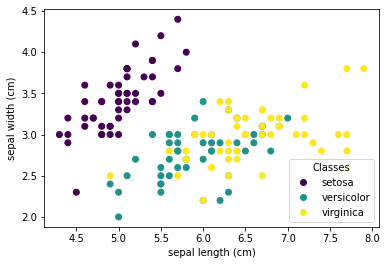

In [241]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

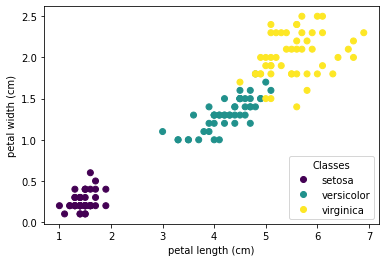

In [494]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)  # Acesso aos dados de pétala
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])  # Definindo os rótulos dos eixos
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.show()


In [242]:
import plotly.express as px

In [243]:
import numpy as np
import pandas as pd

In [244]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [493]:
fig = px.scatter_3d(iris_df, x= 'sepal length (cm)', y= 'sepal width (cm)', z= 'petal width (cm)', color = 'target')
fig.show()

#### Gráfico de dispersão em pares, para visualizar a relação entre diferentes variáveis do conjunto de dados.

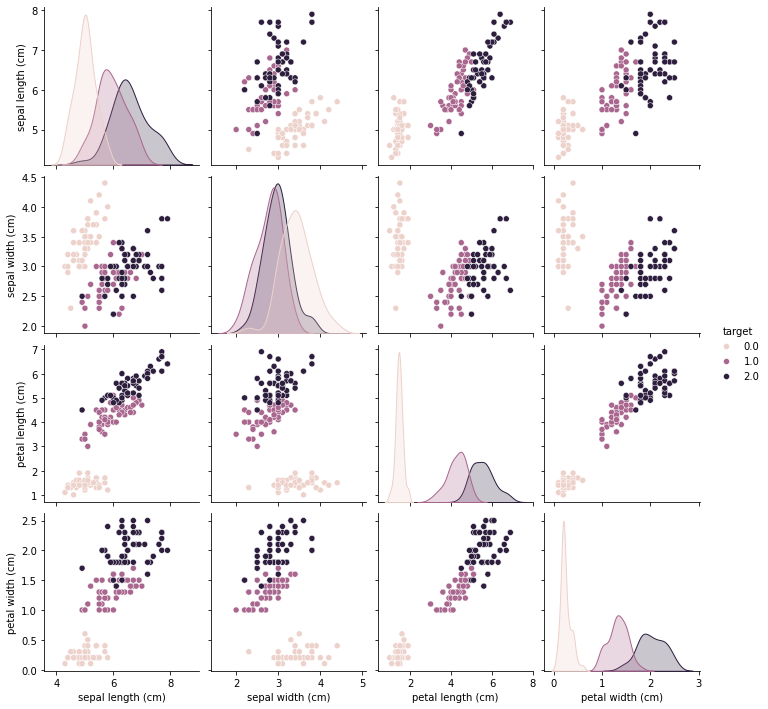

In [491]:
sns.pairplot( data=iris_df, vars=('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'), hue='target' )

## Separando as features e target do dataset, dividindo os dados para treino e teste

In [257]:
feature_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
x = iris_df[feature_columns].values
y = iris_df['target'].values

In [258]:
#shuffle=true -> para embaralhar os dados, evitando que a ordem do conjunto de dados influencie no resultado
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, shuffle= True, random_state = 30)

## 1. KNN

In [259]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [260]:
y_pred = neigh.predict(x_test)

#### Matriz confusão
Os elementos diagonais representam o número de pontos para os quais o rótulo previsto é igual ao rótulo verdadeiro, enquanto os elementos fora da diagonal são aqueles que foram rotulados incorretamente pelo classificador. Quanto maiores os valores diagonais da matriz de confusão melhor, indicando muitas previsões corretas.

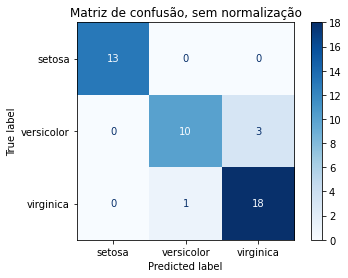

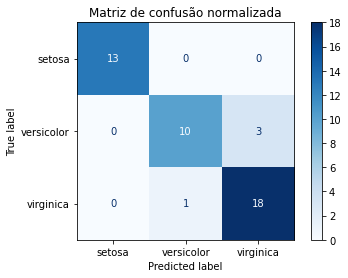

In [261]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

class_names = iris.target_names

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()

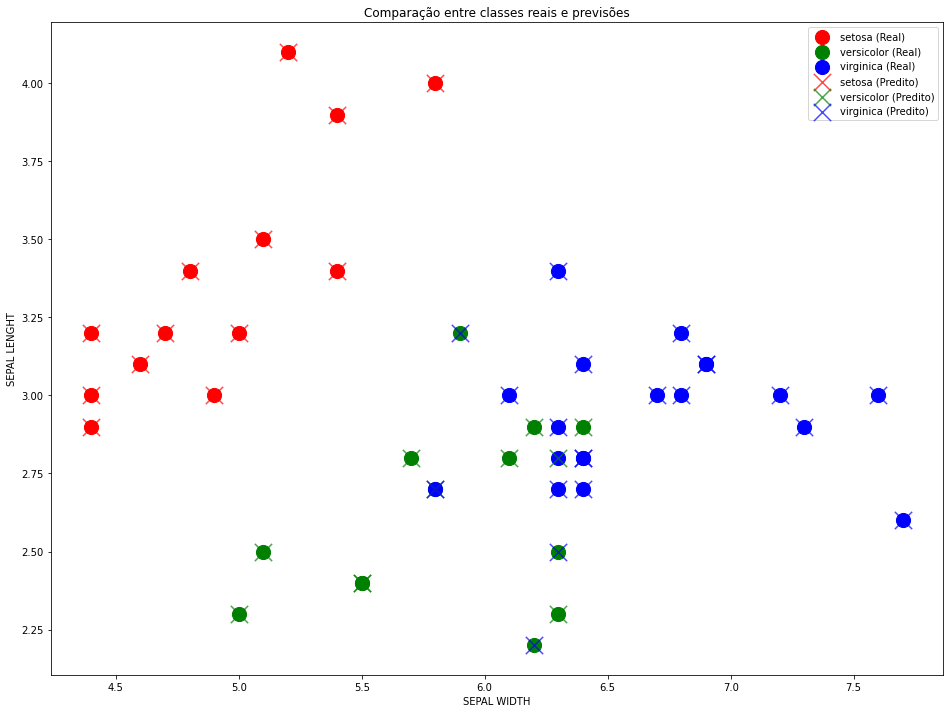

In [263]:
import matplotlib.pyplot as plt

# Mapeia os rótulos numéricos para os nomes das flores
class_names = iris.target_names

x_test_selected = x_test[:, :2] 

# Definindo cores fixas para as classes
class_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}

plt.figure(figsize=(16, 12))  

# Plot dos pontos de teste reais
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)

# Plot dos pontos de teste previstos
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_pred == i, 0], x_test_selected[y_pred == i, 1], marker='x', s=300, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()

#### Agora para n_neighbors = 5

In [264]:
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(x_train, y_train)

KNeighborsClassifier()

In [265]:
y_pred_5 = neigh_5.predict(x_test)

#### Matriz confusão
Os elementos diagonais representam o número de pontos para os quais o rótulo previsto é igual ao rótulo verdadeiro, enquanto os elementos fora da diagonal são aqueles que foram rotulados incorretamente pelo classificador. Quanto maiores os valores diagonais da matriz de confusão melhor, indicando muitas previsões corretas.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 11  2]
 [ 0  1 18]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.84615385 0.15384615]
 [0.         0.05263158 0.94736842]]


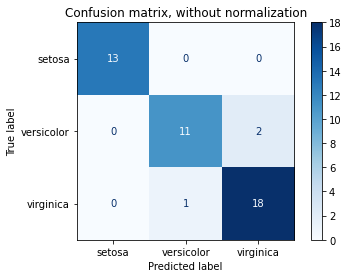

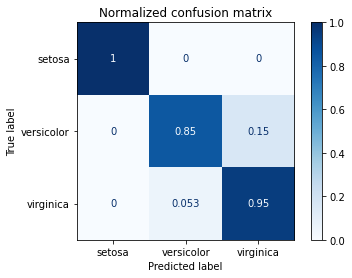

In [266]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

class_names = iris.target_names

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        neigh_5,
        x_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

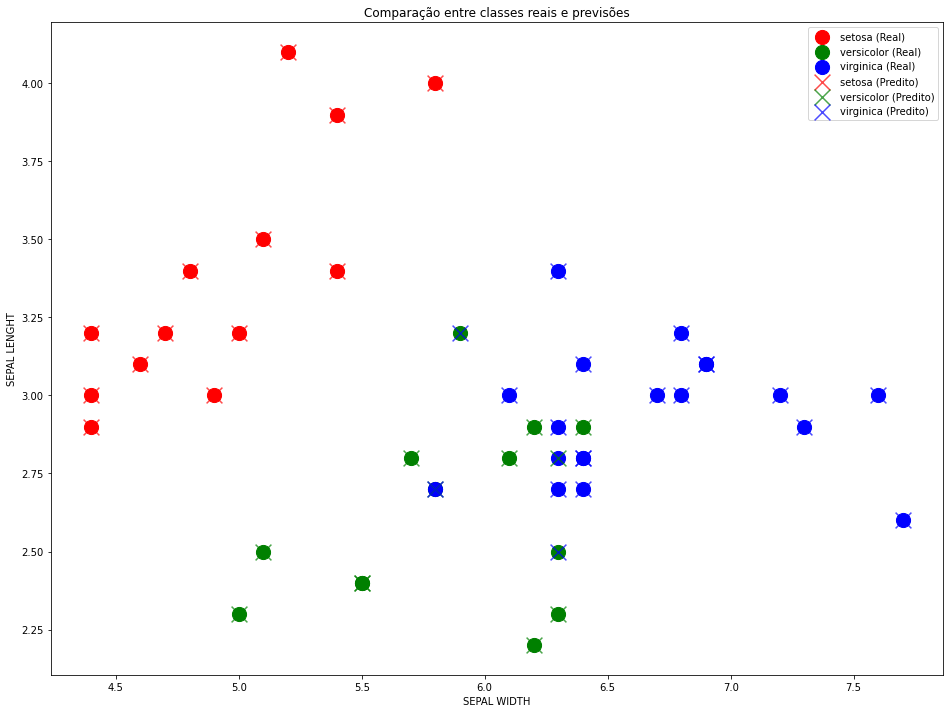

In [267]:
import matplotlib.pyplot as plt

# Mapeia os rótulos numéricos para os nomes das flores
class_names = iris.target_names

x_test_selected = x_test[:, :2] 

# Definindo cores fixas para as classes
class_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}

plt.figure(figsize=(16, 12))  

# Plot dos pontos de teste reais
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)

# Plot dos pontos de teste previstos
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_pred_5 == i, 0], x_test_selected[y_pred_5 == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()

#### Agora para n_neighbors = 15

In [268]:
neigh_15 = KNeighborsClassifier(n_neighbors=15)
neigh_15.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [269]:
y_pred_15 = neigh_15.predict(x_test)

#### Matriz confusão
Os elementos diagonais representam o número de pontos para os quais o rótulo previsto é igual ao rótulo verdadeiro, enquanto os elementos fora da diagonal são aqueles que foram rotulados incorretamente pelo classificador. Quanto maiores os valores diagonais da matriz de confusão melhor, indicando muitas previsões corretas.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 13  0]
 [ 0  2 17]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.10526316 0.89473684]]


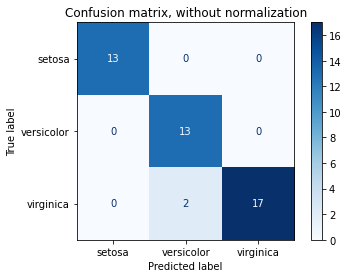

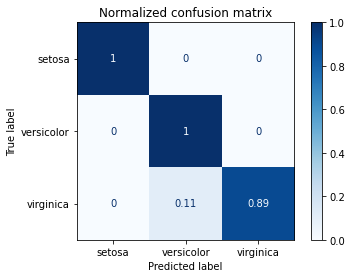

In [270]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

class_names = iris.target_names

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        neigh_15,
        x_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

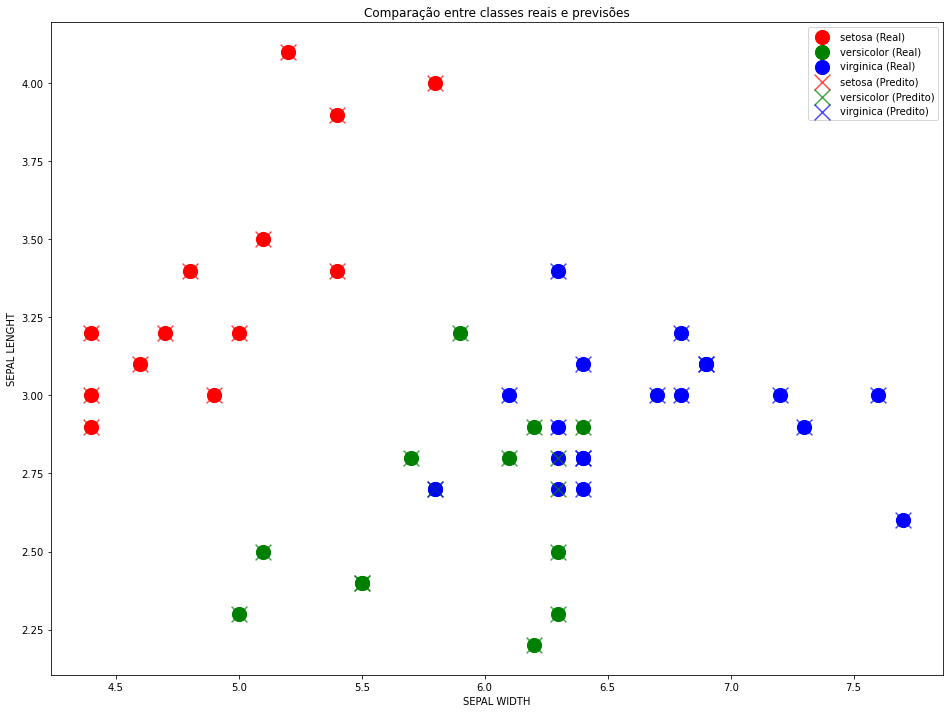

In [271]:
import matplotlib.pyplot as plt

# Mapeia os rótulos numéricos para os nomes das flores
class_names = iris.target_names

x_test_selected = x_test[:, :2] 

# Definindo cores fixas para as classes
class_colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}

plt.figure(figsize=(16, 12))  

# Plot dos pontos de teste reais
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)

# Plot dos pontos de teste previstos
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_pred_15 == i, 0], x_test_selected[y_pred_15 == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()


## Métricas de Qualidade KNN para o dataset Iris

#### Acuracia

In [370]:
#Acuracia k=1
from sklearn.metrics import accuracy_score
accuracy_score_knn_1 = accuracy_score(y_test, y_pred)
print(accuracy_score_knn_1)

0.9111111111111111


In [372]:
#Acuracia k=5
from sklearn.metrics import accuracy_score
accuracy_score_knn_5 = accuracy_score(y_test, y_pred_5)
print(accuracy_score_knn_5)

0.9333333333333333


In [373]:
#Acuracia k=15
from sklearn.metrics import accuracy_score
accuracy_score_knn_15 = accuracy_score(y_test, y_pred_15)
print(accuracy_score_knn_15)

0.9555555555555556


#### Precisão
 'micro':

    Calcule métricas globalmente contando o total de verdadeiros positivos, falsos negativos e falsos positivos.
'macro':

    Calcule as métricas para cada rótulo e encontre sua média não ponderada. Isto não leva em consideração o desequilíbrio do rótulo.
'weighted':

    Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo). Isto altera o 'macro' para compensar o desequilíbrio do rótulo; pode resultar em uma pontuação F que não está entre a precisão e a recuperação.


In [282]:
#precisão k=1
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.9220779220779222

In [283]:
#precisão k=1
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_5, average='macro')

0.9388888888888888

In [284]:
#precisão k=1
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_15, average='macro')

0.9555555555555556

# 2. MLP

classe sklearn.neural_network. MLPClassifier ( Hidden_layer_sizes = (100,) , ativação = 'relu' , * , solucionador = 'adam' , alfa = 0,0001 , batch_size = 'auto' , taxa de aprendizagem = 'constante' , taxa de aprendizagem_init = 0,001 , potência_t = 0,5 , max_iter = 200 , shuffle = True , random_state = None , tol = 0.0001 , verbose = False , warm_start = False , momentum = 0.9 , nesterovs_momentum = True , early_stopping = False , validação_fraction = 0.1 , beta_1 = 0.9 , beta_2 = 0.999 , épsilon = 1e-08 , n_iter_no_change = 10 , max_fun = 15000 )

In [285]:
from sklearn.neural_network import MLPClassifier

Observação: o solucionador padrão 'adam' funciona muito bem em conjuntos de dados relativamente grandes (com milhares de amostras de treinamento ou mais) em termos de tempo de treinamento e pontuação de validação. Para conjuntos de dados pequenos, entretanto, 'lbfgs' pode convergir mais rapidamente e ter melhor desempenho.

In [286]:
mlp=MLPClassifier(hidden_layer_sizes=(3, 3), activation='relu', solver='lbfgs', alpha=0.0001, max_iter=300)

In [287]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=300, solver='lbfgs')

In [288]:
prediction = mlp.predict(x_test)

In [289]:
print(prediction)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


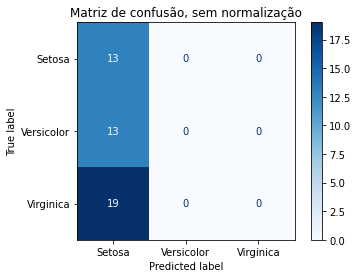

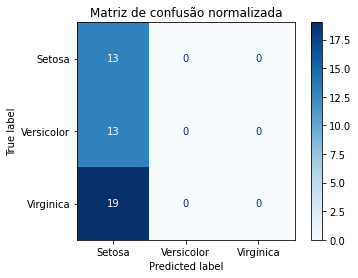

In [290]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction)

class_names = ["Setosa", "Versicolor", "Virginica"]  

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()


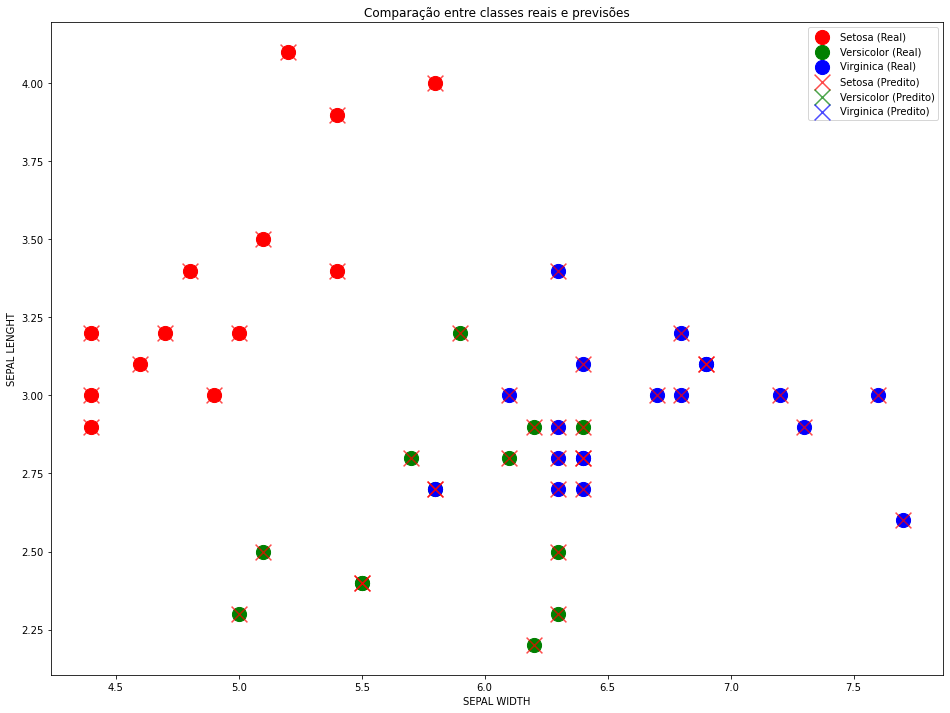

In [291]:
import matplotlib.pyplot as plt

# Mapeia os rótulos numéricos para os nomes das flores
class_names = ["Setosa", "Versicolor", "Virginica"]

x_test_selected = x_test[:, :2] 

# Definindo cores fixas para as classes
class_colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

plt.figure(figsize=(16, 12))  

# Plot dos pontos de teste reais
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)

# Plot dos pontos de teste previstos
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[prediction == i, 0], x_test_selected[prediction == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()

##### Deixando "Hidden_layer_sizes" com o valor default, que é  Hidden_layer_sizes = (100,) 

In [292]:
mlp_2=MLPClassifier(activation='relu', solver='lbfgs', alpha=0.0001, max_iter=300)

In [293]:
mlp_2.fit(x_train,y_train)

MLPClassifier(max_iter=300, solver='lbfgs')

In [294]:
prediction_2 = mlp_2.predict(x_test)

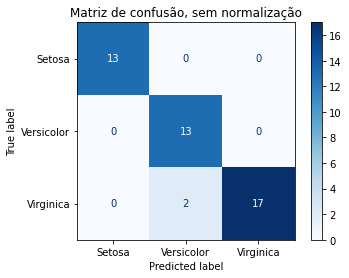

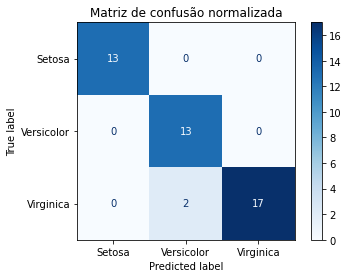

In [295]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_2)

class_names = ["Setosa", "Versicolor", "Virginica"] 

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()


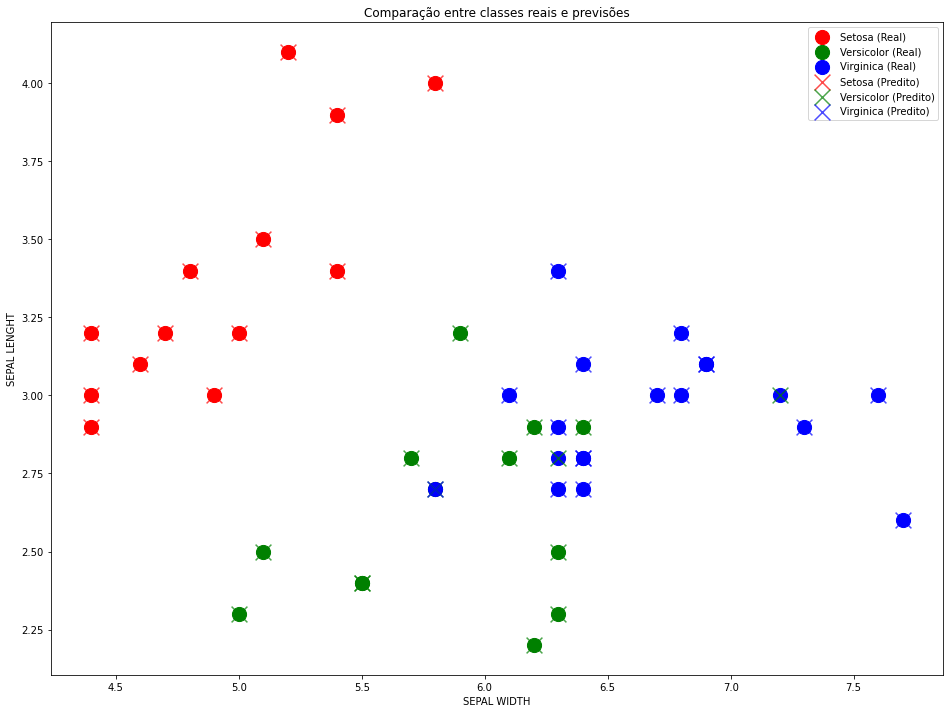

In [296]:
import matplotlib.pyplot as plt

# Mapeia os rótulos numéricos para os nomes das flores
class_names = ["Setosa", "Versicolor", "Virginica"]

x_test_selected = x_test[:, :2] 

# Definindo cores fixas para as classes
class_colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

plt.figure(figsize=(16, 12))  

# Plot dos pontos de teste reais
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)

# Plot dos pontos de teste previstos
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[prediction_2 == i, 0], x_test_selected[prediction_2 == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()

##### Usando os parametros do primeiro treinamento, mas mudando a função de ativação

In [297]:
mlp_atv=MLPClassifier(hidden_layer_sizes=(3, 3), activation='tanh', solver='lbfgs', alpha=0.0001, max_iter=300)

In [298]:
mlp_atv.fit(x_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(3, 3), max_iter=300,
              solver='lbfgs')

In [299]:
prediction_atv = mlp_atv.predict(x_test)

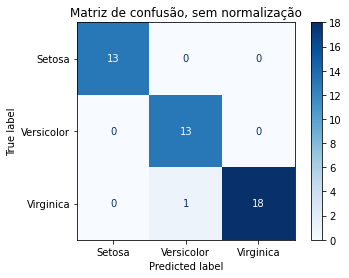

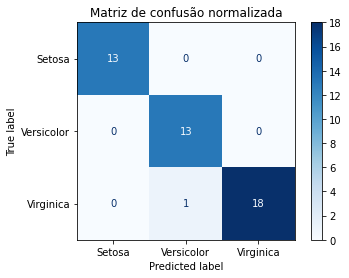

In [300]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_atv)

class_names = ["Setosa", "Versicolor", "Virginica"]  

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()

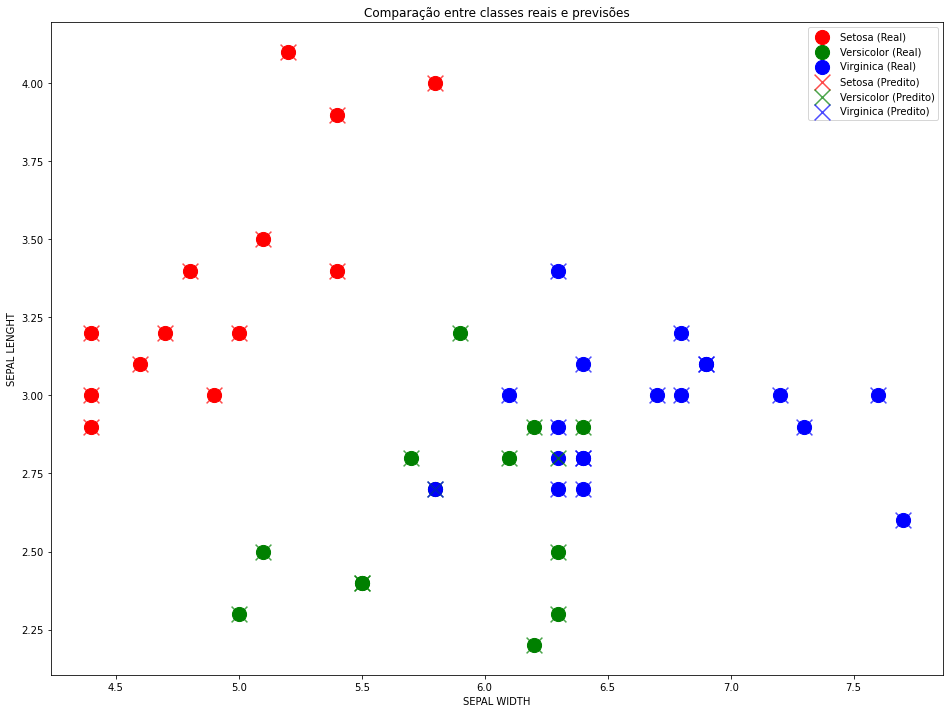

In [301]:
import matplotlib.pyplot as plt

# Mapeia os rótulos numéricos para os nomes das flores
class_names = ["Setosa", "Versicolor", "Virginica"]

x_test_selected = x_test[:, :2] 

# Definindo cores fixas para as classes
class_colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

plt.figure(figsize=(16, 12))  

# Plot dos pontos de teste reais
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)

# Plot dos pontos de teste previstos
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[prediction_atv == i, 0], x_test_selected[prediction_atv == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()

##### Usando os parametros do primeiro treinamento, mas mudando o solucionador

In [302]:
mlp_sol=MLPClassifier(hidden_layer_sizes=(3, 3), activation='relu', solver='sgd', alpha=0.0001, max_iter=300)

In [303]:
mlp_sol.fit(x_train,y_train)

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=300, solver='sgd')

In [304]:
prediction_sol = mlp_sol.predict(x_test)

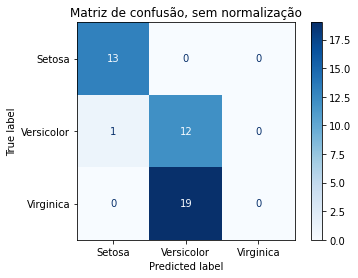

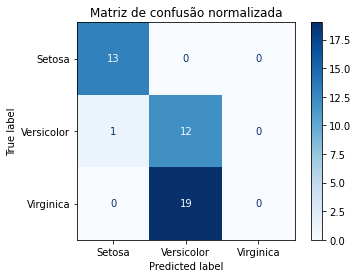

In [305]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_sol)

class_names = ["Setosa", "Versicolor", "Virginica"]  

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()

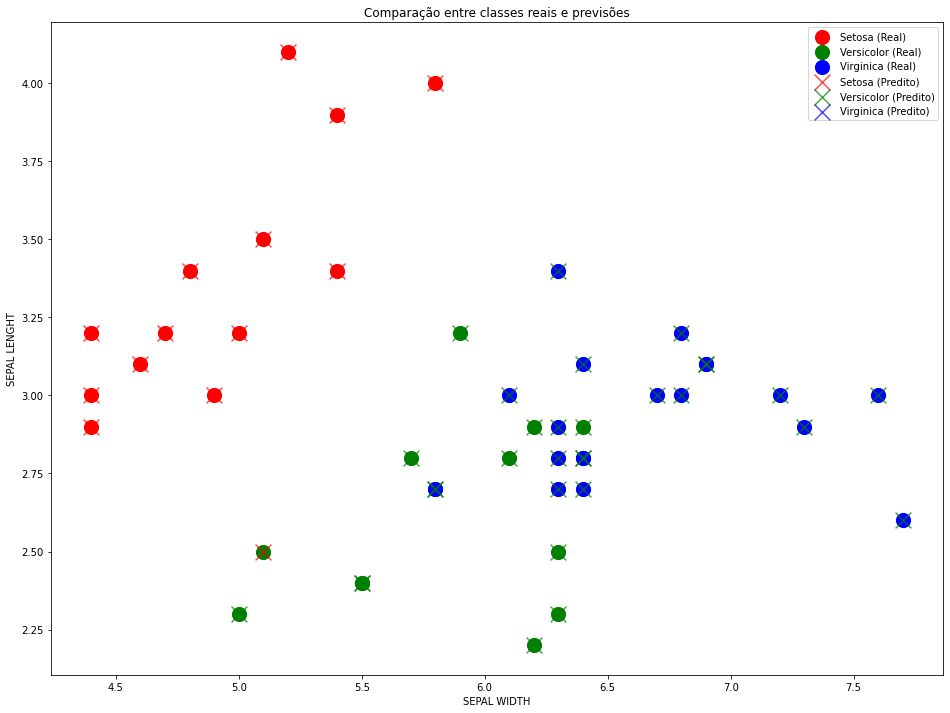

In [306]:
import matplotlib.pyplot as plt

# Mapeia os rótulos numéricos para os nomes das flores
class_names = ["Setosa", "Versicolor", "Virginica"]

x_test_selected = x_test[:, :2] 

# Definindo cores fixas para as classes
class_colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

plt.figure(figsize=(16, 12))  

# Plot dos pontos de teste reais
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)

# Plot dos pontos de teste previstos
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[prediction_sol == i, 0], x_test_selected[prediction_sol == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()

##### Usando os parametros do primeiro treinamento, mas aumentando o valor de alfa para 0.01

In [307]:
mlp_alfa=MLPClassifier(hidden_layer_sizes=(3, 3), activation='relu', solver='sgd', alpha=0.01, max_iter=300)

In [308]:
mlp_alfa.fit(x_train,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(3, 3), max_iter=300, solver='sgd')

In [309]:
prediction_alfa = mlp_alfa.predict(x_test)

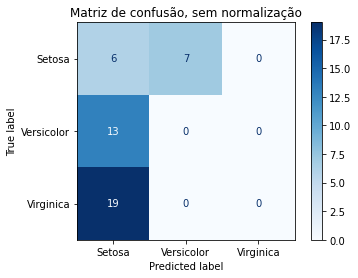

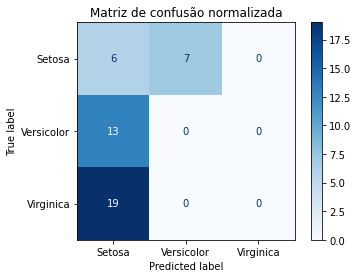

In [310]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_alfa)

class_names = ["Setosa", "Versicolor", "Virginica"] 

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()

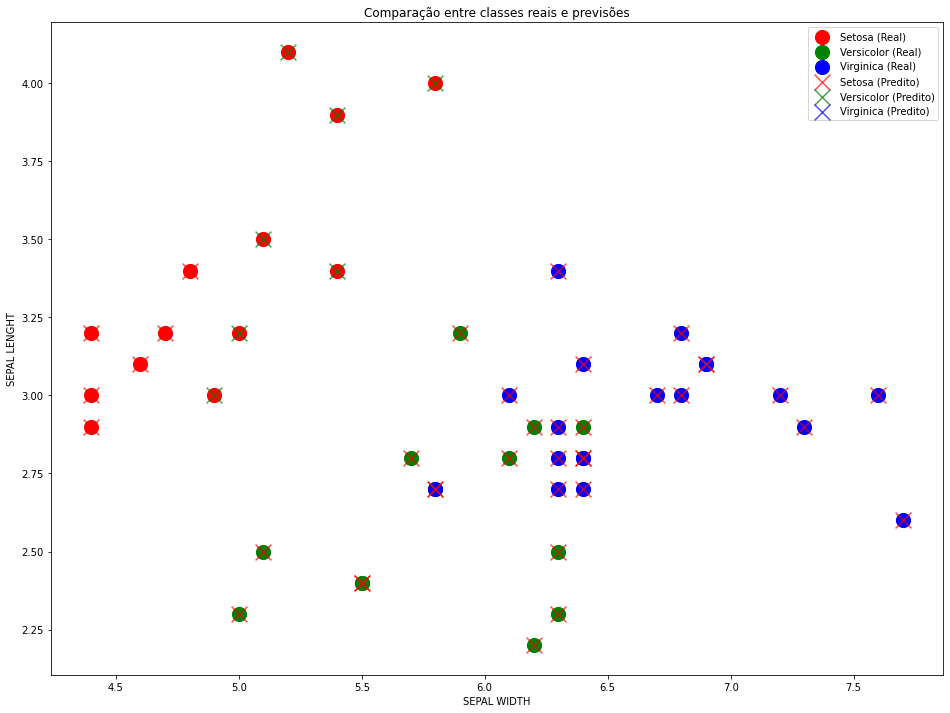

In [311]:
import matplotlib.pyplot as plt

# Mapeia os rótulos numéricos para os nomes das flores
class_names = ["Setosa", "Versicolor", "Virginica"]

x_test_selected = x_test[:, :2] 

# Definindo cores fixas para as classes
class_colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

plt.figure(figsize=(16, 12))  

# Plot dos pontos de teste reais
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)

# Plot dos pontos de teste previstos
for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[prediction_alfa == i, 0], x_test_selected[prediction_alfa == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()


##### Usando os parametros do primeiro treinamento, mas diminuindo o valor de alfa para 0.0000001

In [312]:
mlp_alfa2=MLPClassifier(hidden_layer_sizes=(3, 3), activation='relu', solver='sgd', alpha= 0.0000001, max_iter=300)

In [313]:
mlp_alfa2.fit(x_train,y_train)

MLPClassifier(alpha=1e-07, hidden_layer_sizes=(3, 3), max_iter=300,
              solver='sgd')

In [314]:
prediction_alfa2 = mlp_alfa2.predict(x_test)

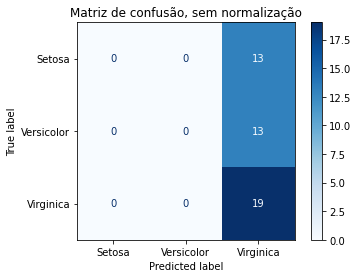

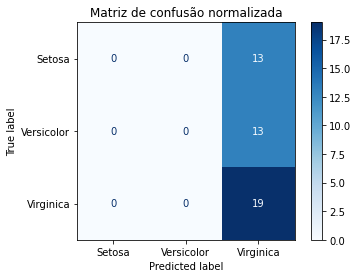

In [315]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_alfa2)

class_names = ["Setosa", "Versicolor", "Virginica"] 

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()

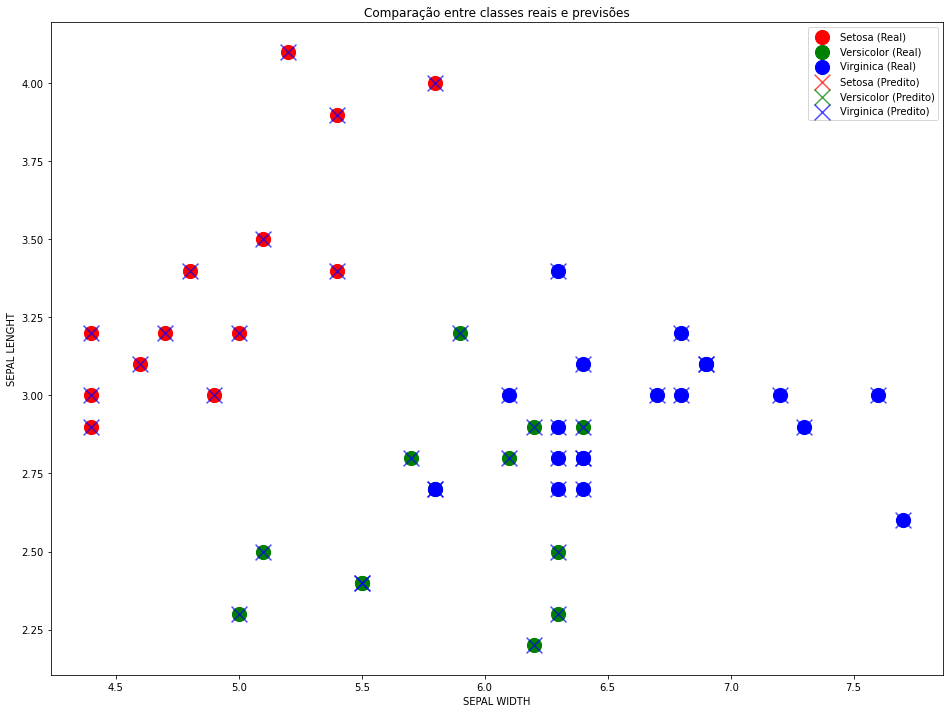

In [316]:
import matplotlib.pyplot as plt


class_names = ["Setosa", "Versicolor", "Virginica"]

x_test_selected = x_test[:, :2] 


class_colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

plt.figure(figsize=(16, 12))  


for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)


for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[prediction_alfa2 == i, 0], x_test_selected[prediction_alfa2 == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()


# Métricas de Qualidade MLP para o dataset Iris


#### Acuracia

In [317]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.28888888888888886

In [318]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction_2)

0.9555555555555556

In [319]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction_atv)

0.9777777777777777

In [320]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction_sol)

0.5555555555555556

In [321]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction_alfa)

0.13333333333333333

In [322]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction_alfa2)

0.4222222222222222

#### Precisão
 'micro':

    Calcule métricas globalmente contando o total de verdadeiros positivos, falsos negativos e falsos positivos.
'macro':

    Calcule as métricas para cada rótulo e encontre sua média não ponderada. Isto não leva em consideração o desequilíbrio do rótulo.
'weighted':

    Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo). Isto altera o 'macro' para compensar o desequilíbrio do rótulo; pode resultar em uma pontuação F que não está entre a precisão e a recuperação.

precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 

In [324]:
from sklearn.metrics import precision_score
precision_score(y_test, prediction, average='macro')

/home/tuane/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.09629629629629628

In [325]:
from sklearn.metrics import precision_score
precision_score(y_test, prediction_2, average='macro')

0.9555555555555556

In [326]:
from sklearn.metrics import precision_score
precision_score(y_test, prediction_atv, average='macro')

0.9761904761904763

In [327]:
from sklearn.metrics import precision_score
precision_score(y_test, prediction_sol, average='macro')

/home/tuane/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.4385560675883256

In [328]:
from sklearn.metrics import precision_score
precision_score(y_test, prediction_alfa, average='macro')

/home/tuane/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.05263157894736842

In [329]:
from sklearn.metrics import precision_score
precision_score(y_test, prediction_alfa2, average='macro')

/home/tuane/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.14074074074074075

## 3. SVM

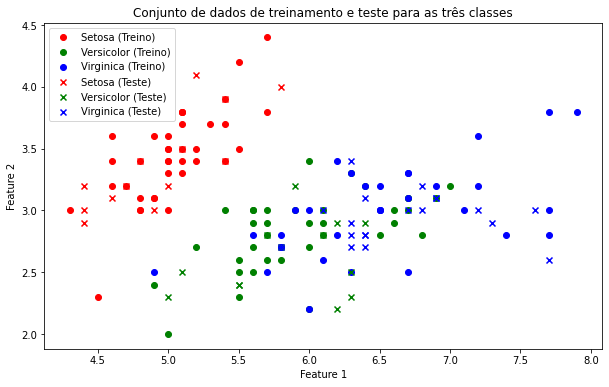

In [341]:
import matplotlib.pyplot as plt

classes = ['Setosa', 'Versicolor', 'Virginica']

colors = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))

for i in range(3):
    plt.scatter(x_train[y_train == i, 0], x_train[y_train == i, 1], c=colors[i], label=classes[i] + ' (Treino)')

for i in range(3):
    plt.scatter(x_test[y_test == i, 0], x_test[y_test == i, 1], c=colors[i], marker='x', label=classes[i] + ' (Teste)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Conjunto de dados de treinamento e teste para as três classes')
plt.legend()
plt.show()

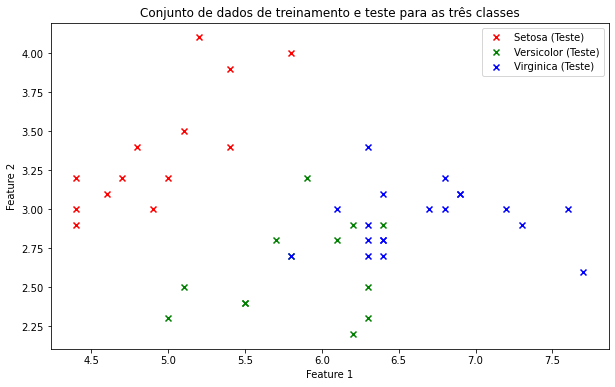

In [342]:
import matplotlib.pyplot as plt

classes = ['Setosa', 'Versicolor', 'Virginica']


colors = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))


for i in range(3):
    plt.scatter(x_test[y_test == i, 0], x_test[y_test == i, 1], c=colors[i], marker='x', label=classes[i] + ' (Teste)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Conjunto de dados de treinamento e teste para as três classes')
plt.legend()
plt.show()

In [330]:
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

#### C controla a penalidade por violações de margem.

Valores menores de C permitem uma margem mais ampla, permitindo que alguns pontos de treinamento sejam classificados incorretamente. Isso pode resultar em uma fronteira de decisão mais suave e generalizável, mas pode levar a uma maior taxa de erro nos dados de treinamento.

Valores maiores de C penalizam mais fortemente as violações de margem, forçando o classificador a se ajustar mais rigidamente aos dados de treinamento. Isso pode resultar em uma fronteira de decisão mais ajustada aos dados de treinamento, mas também pode aumentar o risco de overfitting.


classe sklearn.svm. SVC ( * , C = 1,0 , kernel = 'rbf' , grau = 3 , gama = 'escala' , coef0 = 0,0 , encolhimento = True , probabilidade = False , tol = 0,001 , cache_size = 200 , class_weight = None , detalhado = Falso , max_iter = -1 , decisão_function_shape = 'ovr' , break_ties = False , random_state = None )

In [349]:
#C = 1.0 é uma valor intermediário 
C = 1.0
model_svc = svm.SVC(kernel="linear", C=C)

In [350]:
model_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [351]:
pred=model_svc.predict(x_test)

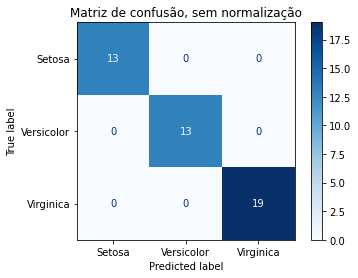

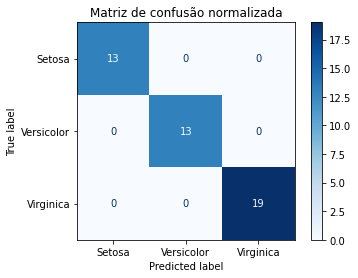

In [352]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)

class_names = ["Setosa", "Versicolor", "Virginica"] 

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()

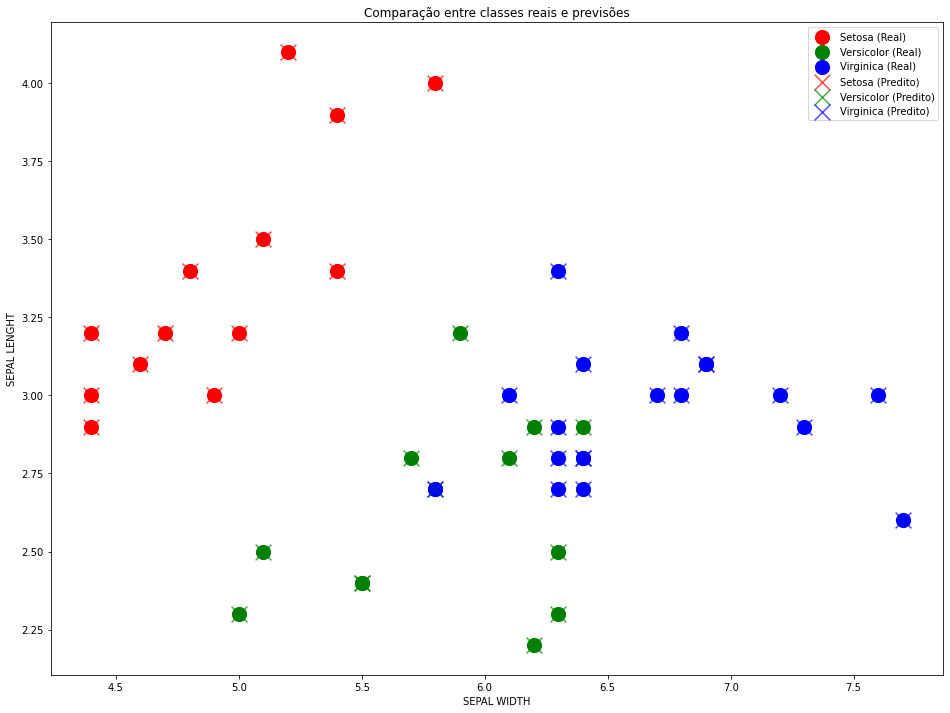

In [353]:
import matplotlib.pyplot as plt


class_names = ["Setosa", "Versicolor", "Virginica"]

x_test_selected = x_test[:, :2] 


class_colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

plt.figure(figsize=(16, 12))  


for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)


for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[pred == i, 0], x_test_selected[pred == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()

Agora escolhendo um kernel não linear, mas valores maiores para c.

In [346]:
C = 20
model_svc_poly = svm.SVC(kernel="poly", C=C)

In [347]:
model_svc_poly.fit(x_train, y_train)

SVC(C=20, kernel='poly')

In [348]:
pred_poly=model_svc_poly.predict(x_test)

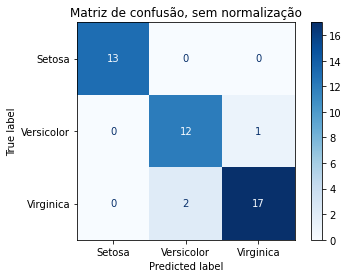

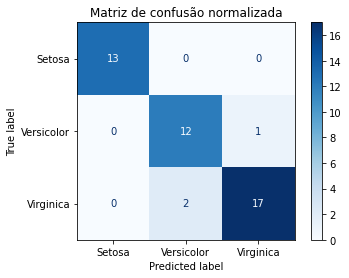

In [354]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_poly)

class_names = ["Setosa", "Versicolor", "Virginica"] 

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()

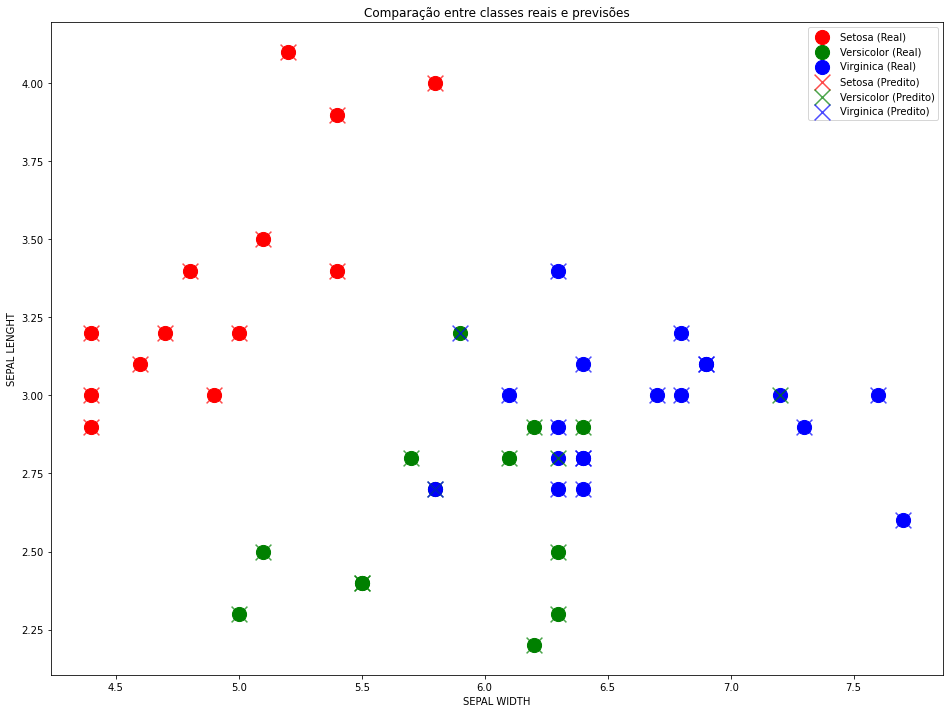

In [355]:
import matplotlib.pyplot as plt


class_names = ["Setosa", "Versicolor", "Virginica"]

x_test_selected = x_test[:, :2] 


class_colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

plt.figure(figsize=(16, 12))  


for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)


for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[pred_poly == i, 0], x_test_selected[pred_poly == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()

Para comparação, escolhendo kernel linear, mas com valores maiores para c.

In [357]:
C = 20
model_svc_linear = svm.SVC(kernel="linear", C=C)

In [358]:
model_svc_linear.fit(x_train, y_train)

SVC(C=20, kernel='linear')

In [359]:
pred_linear=model_svc_linear.predict(x_test)

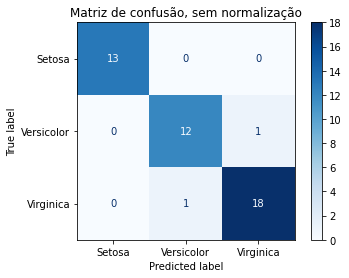

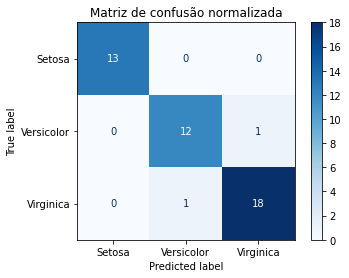

In [360]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_linear)

class_names = ["Setosa", "Versicolor", "Virginica"] 

titles_options = [
    ("Matriz de confusão, sem normalização", None),
    ("Matriz de confusão normalizada", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='.4g', ax=None)
    plt.title(title)
    plt.show()

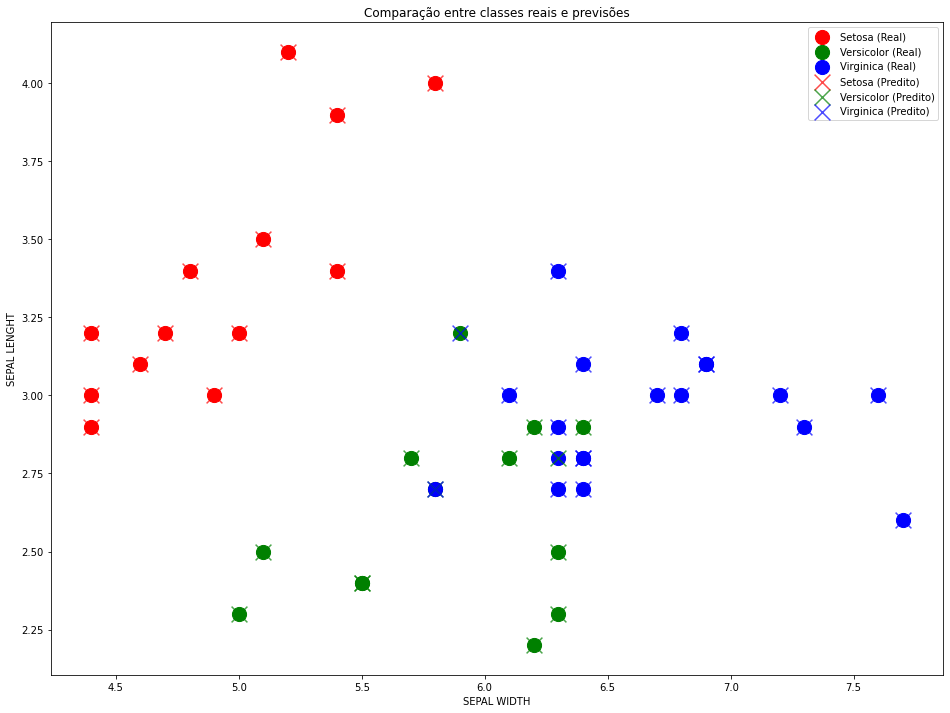

In [361]:
import matplotlib.pyplot as plt


class_names = ["Setosa", "Versicolor", "Virginica"]

x_test_selected = x_test[:, :2] 


class_colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

plt.figure(figsize=(16, 12))  


for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[y_test == i, 0], x_test_selected[y_test == i, 1], label=f'{class_name} (Real)', color=class_colors[class_name], s=200)


for i, class_name in enumerate(class_names):
    plt.scatter(x_test_selected[pred_linear == i, 0], x_test_selected[pred_linear == i, 1], marker='x', s=250, alpha=0.7, label=f'{class_name} (Predito)', color=class_colors[class_name])

plt.title('Comparação entre classes reais e previsões')
plt.xlabel('SEPAL WIDTH')
plt.ylabel('SEPAL LENGHT')
plt.legend()
plt.show()

# Métricas de Qualidade SVM.SVC para o dataset Iris

#### Acuracia

In [362]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0

In [363]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_poly)

0.9333333333333333

In [364]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9555555555555556

#### Precisão
'micro':

    Calcule métricas globalmente contando o total de verdadeiros positivos, falsos negativos e falsos positivos.
'macro':

    Calcule as métricas para cada rótulo e encontre sua média não ponderada. Isto não leva em consideração o desequilíbrio do rótulo.
'weighted':

    Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo). Isto altera o 'macro' para compensar o desequilíbrio do rótulo; pode resultar em uma pontuação F que não está entre a precisão e a recuperação.

precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 

In [365]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, average='macro')

1.0

In [366]:
from sklearn.metrics import precision_score
precision_score(y_test, pred_poly, average='macro')

0.9338624338624338

In [367]:
from sklearn.metrics import precision_score
precision_score(y_test, pred_linear, average='macro')

0.9568151147098516

# 4. Cross validation com 10 fold para cada um dos modelos

In [416]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [434]:
#KNN
models_knn = [neigh, neigh_5, neigh_15]
scores_knn = []

for model in models:
    scores = cross_val_score(model, x, y, cv=10)
    scores_knn.append(scores)
    print(f'Modelo: {model}, Média de Acurácia: {scores.mean()}, Desvio Padrão: {scores.std()}')
    

Modelo: KNeighborsClassifier(n_neighbors=1), Média de Acurácia: 0.96, Desvio Padrão: 0.05333333333333332
Modelo: KNeighborsClassifier(), Média de Acurácia: 0.9666666666666668, Desvio Padrão: 0.04472135954999579
Modelo: KNeighborsClassifier(n_neighbors=15), Média de Acurácia: 0.9733333333333334, Desvio Padrão: 0.03265986323710904


In [435]:
#MLP
models_mlp = [mlp, mlp_2, mlp_atv, mlp_sol, mlp_alfa, mlp_alfa2]
scores_mlp = []

for model in models_mlp:
    scores = cross_val_score(model, x, y, cv=10)
    scores_mlp.append(scores)
    print(f'Modelo: {model}, Média de Acurácia: {scores.mean()}, Desvio Padrão: {scores.std()}')

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Modelo: MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=300, solver='lbfgs'), Média de Acurácia: 0.6866666666666665, Desvio Padrão: 0.3026549190084311
Modelo: MLPClassifier(max_iter=300, solver='lbfgs'), Média de Acurácia: 0.96, Desvio Padrão: 0.044221663871405324


/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Modelo: MLPClassifier(activation='tanh', hidden_layer_sizes=(3, 3), max_iter=300,
              solver='lbfgs'), Média de Acurácia: 0.96, Desvio Padrão: 0.06798692684790378


/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarn

Modelo: MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=300, solver='sgd'), Média de Acurácia: 0.7, Desvio Padrão: 0.1639783183499846


/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarn

Modelo: MLPClassifier(alpha=0.01, hidden_layer_sizes=(3, 3), max_iter=300, solver='sgd'), Média de Acurácia: 0.5266666666666666, Desvio Padrão: 0.17499206331208916


/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarn

Modelo: MLPClassifier(alpha=1e-07, hidden_layer_sizes=(3, 3), max_iter=300,
              solver='sgd'), Média de Acurácia: 0.5533333333333332, Desvio Padrão: 0.1634353422950835


/home/tuane/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



In [436]:
#SVC
models_svm = [model_svc, model_svc_poly, model_svc_linear]
scores_svm = []

for model in models_svc:
    scores = cross_val_score(model, x, y, cv=10)
    scores_svm.append(scores)
    print(f'Modelo: {model}, Média de Acurácia: {scores.mean()}, Desvio Padrão: {scores.std()}')

Modelo: SVC(kernel='linear'), Média de Acurácia: 0.9733333333333334, Desvio Padrão: 0.04422166387140532
Modelo: SVC(C=20, kernel='linear'), Média de Acurácia: 0.9666666666666668, Desvio Padrão: 0.053748384988656986
Modelo: SVC(C=20, kernel='linear'), Média de Acurácia: 0.9666666666666668, Desvio Padrão: 0.053748384988656986


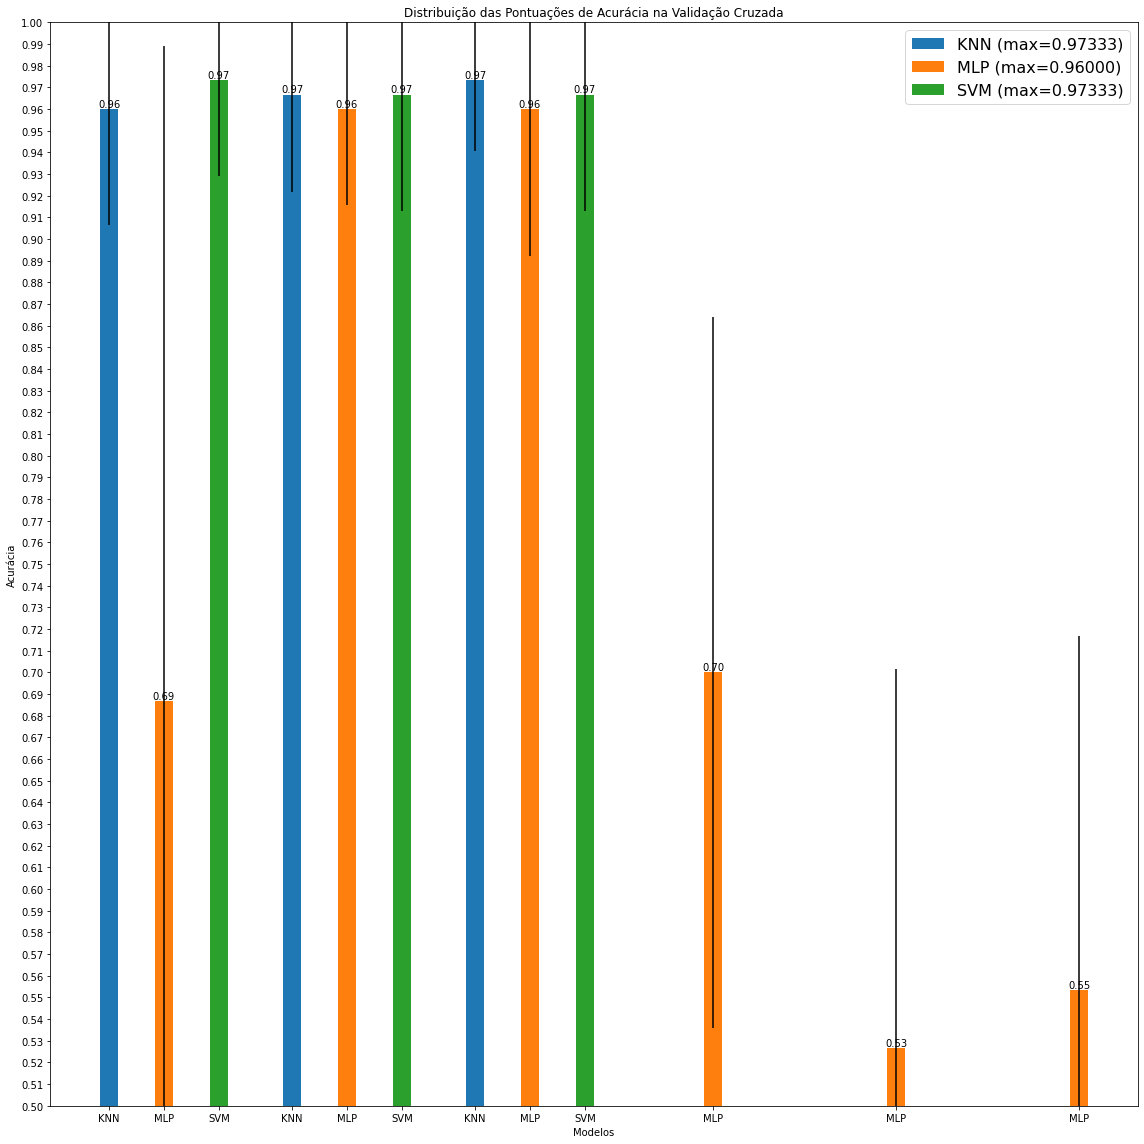

In [490]:
import matplotlib.pyplot as plt
import numpy as np


means_knn = [scores.mean() for scores in scores_knn]
stds_knn = [scores.std() for scores in scores_knn]
max_knn = max(means_knn)

means_mlp = [scores.mean() for scores in scores_mlp]
stds_mlp = [scores.std() for scores in scores_mlp]
max_mlp = max(means_mlp)

means_svm = [scores.mean() for scores in scores_svm]
stds_svm = [scores.std() for scores in scores_svm]
max_svm = max(means_svm)


bar_width = 0.2
spacing = 2

position_knn = np.arange(len(models_knn)) * spacing 
position_mlp = np.arange(len(models_mlp)) * spacing + len(models_knn) * bar_width
position_svm = np.arange(len(models_svm)) * spacing + len(models_knn) * bar_width * 2


plt.figure(figsize=(16, 16))
plt.bar(position_knn, means_knn, bar_width,  yerr=stds_knn,label=f'KNN (max={max_knn:.5f})')
plt.bar(position_mlp, means_mlp, bar_width, yerr=stds_mlp, label=f'MLP (max={max_mlp:.5f})')
plt.bar(position_svm, means_svm, bar_width, yerr=stds_svm, label=f'SVM (max={max_svm:.5f})')


for i, mean_knn in enumerate(means_knn):
    plt.text(position_knn[i], mean_knn, f'{mean_knn:.2f}', ha='center', va='bottom')
for i, mean_mlp in enumerate(means_mlp):
    plt.text(position_mlp[i], mean_mlp, f'{mean_mlp:.2f}', ha='center', va='bottom')
for i, mean_svm in enumerate(means_svm):
    plt.text(position_svm[i], mean_svm, f'{mean_svm:.2f}', ha='center', va='bottom')

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.yticks(np.arange(0.5, 1.1, 0.01))  # Definindo a escala do eixo y
plt.ylim(0.5, 1.0)  # Limitando o eixo y para mostrar apenas valores acima de 0.5
plt.title('Distribuição das Pontuações de Acurácia na Validação Cruzada')
plt.xticks(np.concatenate([position_knn, position_mlp, position_svm]), ['KNN']*len(models_knn) + ['MLP']*len(models_mlp) + ['SVM']*len(models_svm))
plt.legend(prop={'size': 16})
plt.tight_layout()
plt.show()
